# CAPSTONE PROJECT
### Severity of Accidents

This project will be used to analyze accidents' data and predict its severity using Machine Learning models. More over, there needs to be some data cleaning before diving into the modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz

C:\Users\EMILIO\Anaconda3\envs\datascience\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df=pd.read_csv(path)
df.head()

C:\Users\EMILIO\Anaconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.columns.sort_values(ascending=True)

Index(['ADDRTYPE', 'COLDETKEY', 'COLLISIONTYPE', 'CROSSWALKKEY',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'HITPARKEDCAR', 'INATTENTIONIND',
       'INCDATE', 'INCDTTM', 'INCKEY', 'INTKEY', 'JUNCTIONTYPE', 'LIGHTCOND',
       'LOCATION', 'OBJECTID', 'PEDCOUNT', 'PEDCYLCOUNT', 'PEDROWNOTGRNT',
       'PERSONCOUNT', 'REPORTNO', 'ROADCOND', 'SDOTCOLNUM', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'SEGLANEKEY', 'SEVERITYCODE', 'SEVERITYCODE.1',
       'SEVERITYDESC', 'SPEEDING', 'STATUS', 'ST_COLCODE', 'ST_COLDESC',
       'UNDERINFL', 'VEHCOUNT', 'WEATHER', 'X', 'Y'],
      dtype='object')

In [5]:
labels = ['X','Y','OBJECTID','INCKEY','COLDETKEY','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC',
          'SEVERITYDESC','SEVERITYCODE.1','CROSSWALKKEY','INCDATE','LOCATION','SDOTCOLNUM',
          'SEGLANEKEY','SDOT_COLDESC', 'STATUS','ST_COLCODE', 'ST_COLDESC','PEDCOUNT', 'PEDCYLCOUNT',
       'PEDROWNOTGRNT','PERSONCOUNT','SDOT_COLCODE','VEHCOUNT','HITPARKEDCAR','INCDTTM']
df_filtered=df.drop(columns=labels,axis=1)
df_filtered.head()

,SEVERITYCODE,REPORTNO,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,3502005,Intersection,Angles,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN
1,1,2607959,Block,Sideswipe,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,1482393,Block,Parked Car,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN
3,1,3503937,Block,Other,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
4,2,1807429,Intersection,Angles,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN


In [6]:
df_filtered.shape

(194673, 11)

## Exploratory Analysis

First, I want to check if there are repeated rows of information and delete them if necessary.

In [7]:
df_filtered.rename(columns={'SEVERITYCODE':'SEVERITY'},inplace=True)
df_filtered.head()

,SEVERITY,REPORTNO,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,3502005,Intersection,Angles,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN
1,1,2607959,Block,Sideswipe,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,1482393,Block,Parked Car,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN
3,1,3503937,Block,Other,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
4,2,1807429,Intersection,Angles,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN


In [8]:
df_filtered = df_filtered.drop_duplicates()
df_filtered.shape

(194670, 11)

This means that there were 3 duplicated rows.

In [9]:
df_filtered.drop(columns='REPORTNO',axis=1,inplace=True)

Next, I want to put the correct types in columns.

In [10]:
df_filtered.dtypes

SEVERITY           int64
ADDRTYPE          object
COLLISIONTYPE     object
JUNCTIONTYPE      object
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
dtype: object

Let's start with the INATTENTIONIND column. Let's change the Y value for 1s and the null values for 0 (given that the driver was actually paying attention).

In [11]:
df_filtered.rename(columns={'INATTENTIONIND':'LACK_ATTENTION'},inplace=True)

In [12]:
df_filtered['LACK_ATTENTION'].replace('Y','1',inplace=True)
df_filtered['LACK_ATTENTION'].replace(np.nan,'0',inplace=True)
df_filtered['LACK_ATTENTION'].value_counts()

0    164866
1     29804
Name: LACK_ATTENTION, dtype: int64

Let's now change it to the type 'int64'.

In [13]:
df_filtered['LACK_ATTENTION']=df_filtered['LACK_ATTENTION'].astype('int64')
df_filtered['LACK_ATTENTION'].dtypes

dtype('int64')

Let's repeat the same for the columns UNDERINFL and SPEEDING. (Yes will be represented as 1 and No as 0)

In [14]:
df_filtered['UNDERINFL'].isnull().value_counts()

False    189786
True       4884
Name: UNDERINFL, dtype: int64

There are some missing values in UNDERINFL. Given that it would be a guess to put either Yes or No for these cases, it is better to drop those rows.

In [15]:
before= df_filtered.shape[0]
df_filtered.dropna(axis=0, subset=['UNDERINFL'], inplace=True)
after= df_filtered.shape[0]
print('Number of dropped rows: %.0f' %(before-after))

Number of dropped rows: 4884


In [16]:
df_filtered['UNDERINFL'].replace('Y','1',inplace=True)
df_filtered['UNDERINFL'].replace('N','0',inplace=True)
df_filtered['UNDERINFL']=df_filtered['UNDERINFL'].astype('int64')
df_filtered['UNDERINFL'].dtypes

dtype('int64')

For SPEEDING:

In [17]:
df_filtered['SPEEDING'].replace('Y','1',inplace=True)
df_filtered['SPEEDING'].replace(np.nan,'0',inplace=True)
df_filtered['SPEEDING']=df_filtered['SPEEDING'].astype('int64')
df_filtered['SPEEDING'].dtypes

dtype('int64')

In [18]:
df_filtered.dtypes

SEVERITY           int64
ADDRTYPE          object
COLLISIONTYPE     object
JUNCTIONTYPE      object
LACK_ATTENTION     int64
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING           int64
dtype: object

Moving on to categorical variables, first we need to check for missing values.

In [19]:
df_filtered.isnull().sum().to_frame('Null_Counts').transpose()

,SEVERITY,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,LACK_ATTENTION,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
Null_Counts,0,1819,21,6178,0,0,197,128,286,0


In the ADDRTYPE, JUNCTIONTYPE, COLLISIONTYPE columns, the NaN values can be changed to "other" or "unknown".

In [20]:
df_filtered['ADDRTYPE'].replace(np.nan,'Other Address Type',inplace=True)
df_filtered['JUNCTIONTYPE'].replace('Unknown','Unknown Junction Type',inplace=True)
df_filtered['JUNCTIONTYPE'].replace(np.nan,'Unknown Junction Type',inplace=True)
df_filtered['COLLISIONTYPE'].replace('Other','Other Collision Type',inplace=True)
df_filtered['COLLISIONTYPE'].replace(np.nan,'Other Collision Type',inplace=True)
df_filtered.isnull().sum().to_frame('Null_Counts').transpose()

,SEVERITY,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,LACK_ATTENTION,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
Null_Counts,0,0,0,0,0,0,197,128,286,0


For the remaining columns, it is easier just to remove the rows that contain NaN values.

In [21]:
df_filtered.dropna(axis=0, subset=['WEATHER','ROADCOND','LIGHTCOND'], inplace=True)
df_filtered.isnull().sum().to_frame('Null_Counts').transpose()

,SEVERITY,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,LACK_ATTENTION,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
Null_Counts,0,0,0,0,0,0,0,0,0,0


There are no more values on the data set, therefore, now I want to balance the data set.

In [22]:
df_filtered['SEVERITY'].value_counts()

1    132284
2     57050
Name: SEVERITY, dtype: int64

It is neccessary to erase some rows with the label 1 to balance this dataset.

In [24]:
df_EA=df_filtered.copy().reset_index(drop=True)
num_2=df_EA['SEVERITY'].value_counts()[2]
num_1=df_EA['SEVERITY'].value_counts()[1]
j=0
while (num_1>num_2):
    
    i=randint(0,len(df_EA)-1)
    if (df_EA.loc[i,'SEVERITY']==1):
        df_EA.drop(index=i,inplace=True)
        df_EA.reset_index(drop=True,inplace=True)
        j=j+1
        
        if (j%10000==0):
            print("There have been %d deletions." %j)
            winsound.Beep(freq, duration)
    
    num_1=df_EA['SEVERITY'].value_counts()[1]

There have been 10000 deletions.
There have been 10000 deletions.
There have been 20000 deletions.
There have been 20000 deletions.
There have been 20000 deletions.
There have been 20000 deletions.
There have been 20000 deletions.
There have been 20000 deletions.
There have been 30000 deletions.
There have been 30000 deletions.
There have been 30000 deletions.
There have been 30000 deletions.
There have been 40000 deletions.
There have been 40000 deletions.
There have been 40000 deletions.
There have been 40000 deletions.
There have been 40000 deletions.
There have been 40000 deletions.
There have been 50000 deletions.
There have been 50000 deletions.
There have been 50000 deletions.
There have been 60000 deletions.
There have been 70000 deletions.
There have been 70000 deletions.


In [26]:
df_EA['SEVERITY'].value_counts()

2    57050
1    57050
Name: SEVERITY, dtype: int64

The data is now balanced and it is a good point to get checkpoint of the data set.

In [30]:
df_EA.to_csv('.\exploratory_analysis_df.csv',header=True,index=False)

In [33]:
df_EA=pd.read_csv('.\exploratory_analysis_df.csv')

Now it is time to perform some visual analysis.

In [128]:
def print_bar(col,col_label):
    """Prints a bar chart of a specified column vs. Severity"""
    
    df_temp=df_EA[[col,'SEVERITY']]
    df_temp= pd.crosstab(df_temp[col],df_temp.SEVERITY)
    df_temp.plot(kind='bar',
                        figsize=(10,6),
                        width=0.8,
                        fontsize=12,
                        )
    title= col_label + " and Severity"
    plt.title(title,fontsize=16)
    plt.xlabel(col_label,fontsize=12)
    plt.ylabel('Count',fontsize=12)
    plt.legend(title='Severity', fontsize=12)
    name = col + '_SVRTY.png'
    #plt.savefig(name, format='png')
    #plt.close("all")
    
    pass

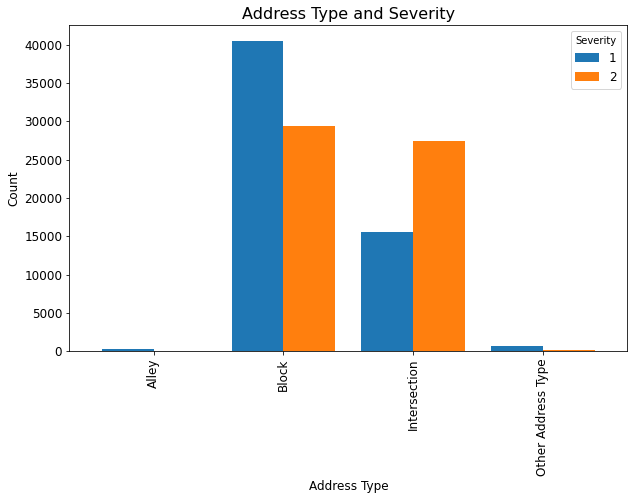

In [129]:
print_bar('ADDRTYPE','Address Type')

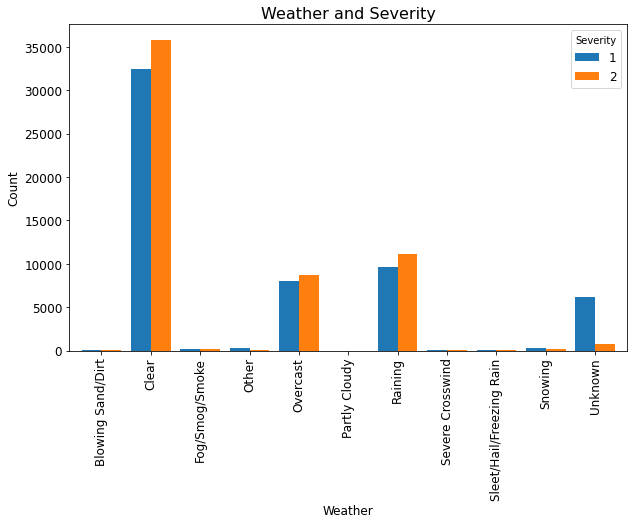

In [130]:
print_bar('WEATHER','Weather')

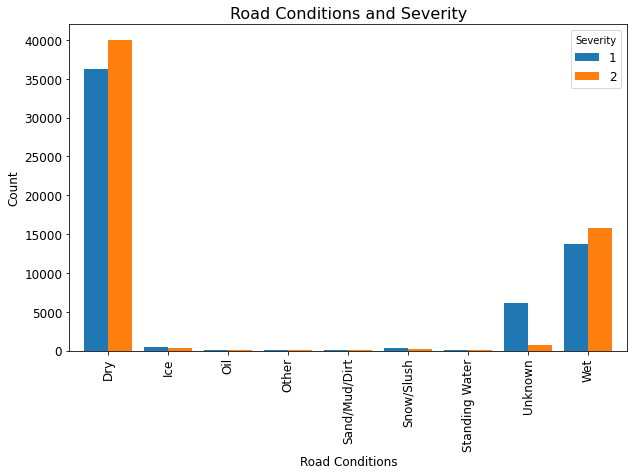

In [131]:
print_bar('ROADCOND','Road Conditions')

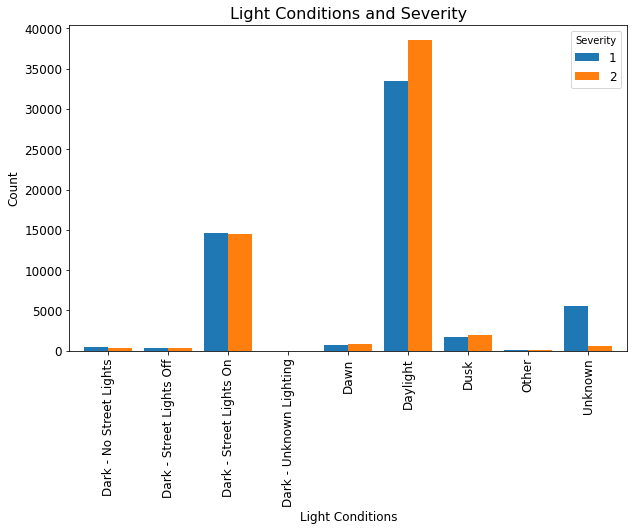

In [133]:
print_bar('LIGHTCOND','Light Conditions')

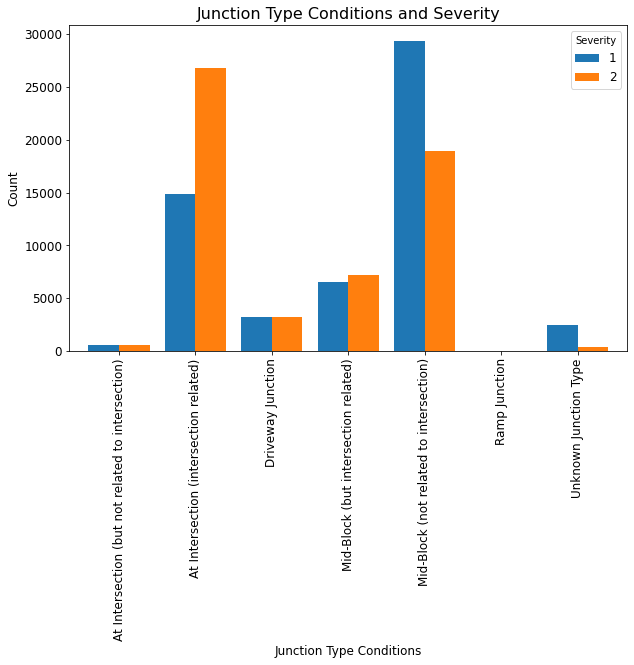

In [154]:
print_bar('JUNCTIONTYPE','Junction Type Conditions')

From these graphs, one can see that the unknowns significantly favor a target label even more than other feature categories in the WEATHER, ROADCOND, LIGHTCOND features. To avoid lossing a significant amout of more data, it will be probably best to return to the unbalanced data set, erase this unknown features, and then balance the data once again.

In [150]:
df_filtered.shape[0]

189334

In [155]:
df_filtered2=df_filtered.copy()
df_filtered2.drop(df_filtered2[df_filtered2['WEATHER']=='Unknown'].index, inplace=True)
df_filtered2.drop(df_filtered2[df_filtered2['ROADCOND']=='Unknown'].index, inplace=True)
df_filtered2.drop(df_filtered2[df_filtered2['JUNCTIONTYPE']=='Unknown Junction Type'].index, inplace=True)
df_filtered2.drop(df_filtered2[df_filtered2['LIGHTCOND']=='Unknown'].index, inplace=True)
print('The number of deleted rows is %d' %(df_filtered.shape[0]-df_filtered2.shape[0]))
print('The shape of the new dataset is: ', df_filtered2.shape)

The number of deleted rows is 21339
The shape of the new dataset is:  (167995, 10)


Now that these incidents have been deleted, let's try to balance the data set once again.

In [156]:
df_filtered2['SEVERITY'].value_counts()

1    112482
2     55513
Name: SEVERITY, dtype: int64

In [166]:
df_EA2=df_filtered2.copy().reset_index(drop=True)
num_2=df_EA2['SEVERITY'].value_counts()[2]
num_1=df_EA2['SEVERITY'].value_counts()[1]
j=0
while (num_1>num_2):
    
    i=randint(0,len(df_EA2)-1)
    if (df_EA2.loc[i,'SEVERITY']==1):
        df_EA2.drop(index=i,inplace=True)
        df_EA2.reset_index(drop=True,inplace=True)
        j=j+1
        num_1=df_EA2['SEVERITY'].value_counts()[1]
        
        if (j%10000==0):
            print("There have been %d deletions." %j)
            winsound.Beep(freq, duration)

winsound.Beep(freq, int(duration/2))
winsound.Beep(freq, int(duration/2))
winsound.Beep(freq, int(duration/2))

In [167]:
df_EA2['SEVERITY'].value_counts()

2    55513
1    55513
Name: SEVERITY, dtype: int64

The dataset is balanced once more. Let's create a new checkpoint.

In [168]:
df_EA2.to_csv('.\df_EA2.csv',header=True,index=False)

In [2]:
df_EA2= pd.read_csv('.\df_EA2.csv')

In [172]:
df_EA2.shape

(111026, 10)

### Encoding the Data

Let's start creating a frame with already encoded variables.

In [3]:
df_encoded=df_EA2[['LACK_ATTENTION','UNDERINFL','SPEEDING','SEVERITY']]

Now we need to change the rest of the columns in df_EA2 into their dummy forms.

In [4]:
data=df_EA2[['ADDRTYPE']]
data = pd.get_dummies(data.ADDRTYPE)
df_encoded=pd.concat([data,df_encoded],axis=1)

data=df_EA2[['COLLISIONTYPE']]
data = pd.get_dummies(data.COLLISIONTYPE)
df_encoded=pd.concat([data,df_encoded],axis=1)

data=df_EA2[['JUNCTIONTYPE']]
data = pd.get_dummies(data.JUNCTIONTYPE)
df_encoded=pd.concat([data,df_encoded],axis=1)

data=df_EA2[['WEATHER']].replace('Other','Other (Weather)')
data = pd.get_dummies(data.WEATHER)
df_encoded=pd.concat([data,df_encoded],axis=1)

data=df_EA2[['ROADCOND']].replace('Other','Other (Road Conditions)')
data = pd.get_dummies(data.ROADCOND)
df_encoded=pd.concat([data,df_encoded],axis=1)

data=df_EA2[['LIGHTCOND']].replace('Other','Other (Light Conditions)')
data = pd.get_dummies(data.LIGHTCOND)
df_encoded=pd.concat([data,df_encoded],axis=1)

In [5]:
df_encoded.head()

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other (Light Conditions),Dry,Ice,...,Right Turn,Sideswipe,Alley,Block,Intersection,Other Address Type,LACK_ATTENTION,UNDERINFL,SPEEDING,SEVERITY
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2


In [204]:
df_encoded.shape

(111026, 50)

## Building the Model

### Train-Test-Split

It is time to separate the features (X), with the target (y).

In [6]:
X=df_encoded.drop('SEVERITY',axis=1)
y=df_encoded['SEVERITY'].values

Next, split the data into a training and testing set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train , X_test , y_train , y_test = train_test_split( X, y, test_size=0.2, random_state=7)

In [9]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (88820, 49)
X_test shape:  (22206, 49)
y_train shape:  (88820,)
y_test shape:  (22206,)


### KNN Model

In [10]:
from sklearn. neighbors import KNeighborsClassifier
from sklearn import metrics

Given that I will be looking for the best K, I will split my training data into an actual training and validation data.

In [212]:
X_train2 , X_val , y_train2 , y_val = train_test_split( X_train, y_train, test_size=0.1, random_state=9)

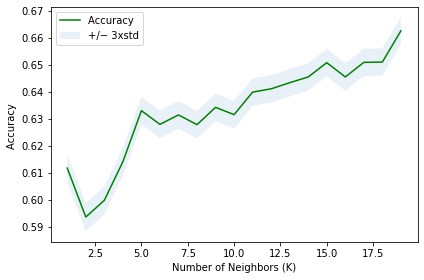

The best accuracy was with 0.6625759963972079 with k= 19


In [218]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train2 ,y_train2)
    yhat=neigh.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score (y_val , yhat)
    std_acc[n-1]=np.std(yhat == y_val )/np.sqrt(yhat.shape[0])
    
#Plot
plt.plot(range(1,Ks),mean_acc ,'g')
plt.fill_between (range(1,Ks),mean_acc- 1 * std_acc ,mean_acc + 1 * std_acc , alpha =0.10)
plt.legend (('Accuracy ', '+/− 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
winsound.Beep(freq, duration)

In [11]:
k=19
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion ="gini")
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### SVM

In [36]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=0.1)
clf.fit(X_train, y_train)

SVC(C=0.1)

### Logistic Regression

In [52]:
from sklearn. linear_model import LogisticRegression
LR = LogisticRegression(C=1 , solver='liblinear').fit(X_train,y_train)

## Model Evaluation

In [13]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [14]:
rep_cols=['Algorithm','Jaccard','F1-score','LogLoss']
report=pd.DataFrame(columns=rep_cols)
algs=['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
report['Algorithm']=algs

In [15]:
yhat_knn=neigh.predict(X_test)
#Jaccard score
report.loc[0,'Jaccard']=round(metrics.jaccard_score(y_test, yhat_knn),2)
#F1-score
report.loc[0,'F1-score']=round(metrics.f1_score(y_test, yhat_knn, average='weighted'),2)

In [18]:
yhat_dt=tree.predict(X_test)
#Jaccard score
report.loc[1,'Jaccard']=round(metrics.jaccard_score(y_test, yhat_dt),2)
#F1-score
report.loc[1,'F1-score']=round(metrics.f1_score(y_test, yhat_dt, average='weighted'),2)

In [37]:
yhat_svm=clf.predict(X_test)
#Jaccard score
report.loc[2,'Jaccard']=round(metrics.jaccard_score(y_test, yhat_svm),2)
#F1-score
report.loc[2,'F1-score']=round(metrics.f1_score(y_test, yhat_svm, average='weighted'),2)

In [53]:
yhat_log=LR.predict(X_test)
yhat_logprob = LR.predict_proba(X_test)
#Jaccard score
report.loc[3,'Jaccard']=round(metrics.jaccard_score(y_test, yhat_log),2)
#F1-score
report.loc[3,'F1-score']=round(metrics.f1_score(y_test, yhat_log, average='weighted'),2)
#LogLoss
report.loc[3,'LogLoss']=round(metrics.log_loss(y_test,yhat_logprob),2)

In [59]:
report["LogLoss"].replace(np.nan,'NA',inplace=True)
report.set_index('Algorithm')

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.48,0.67,NA
Decision Tree,0.47,0.67,NA
SVM,0.49,0.68,NA
Logistic Regression,0.46,0.67,0.58
